In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
 !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.1 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflo

In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
key = os.environ.get('AZURE_SEARCH_KEY', '1b108a98eb0b4354aa1331fbfb4efbbf')

In [7]:
print (key)
search_images_bing

1b108a98eb0b4354aa1331fbfb4efbbf


<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [8]:
results = search_images_bing(key, 'Goddess Saraswati')
ims = results.attrgot('contentUrl')
len(ims)

150

In [9]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [10]:
dest = 'images/Goddess Saraswati.jpg'
download_url(ims[0], dest)

Path('images/Goddess Saraswati.jpg')

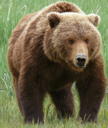

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
bear_types = 'Goddess Saraswati','Goddess Lakshmi','Goddess Parvati', 'Goddess Durga'
path = Path('Goddess')

In [13]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} Goddess')
        download_images(dest, urls=results.attrgot('contentUrl'))
        print (path)

Goddess
Goddess
Goddess
Goddess


In [15]:
fns = get_image_files(path)
fns

(#586) [Path('Goddess/Goddess Durga/41ef35a3-2e5c-48bb-a11a-c9320c45f221.jpg'),Path('Goddess/Goddess Durga/b174896a-f51d-4bfd-9cbb-9681b01fbf99.jpg'),Path('Goddess/Goddess Durga/9d688caa-d75c-4e3c-8fd1-efdc41c462ad.jpg'),Path('Goddess/Goddess Durga/a170faaf-8255-4452-addf-21ad20837537.jpg'),Path('Goddess/Goddess Durga/95052af9-131f-4837-aa5a-c3c0bb84be98.jpg'),Path('Goddess/Goddess Durga/5107c6e5-f68c-47e0-afb7-381de8ef3997.jpg'),Path('Goddess/Goddess Durga/0e9507f5-e0cf-4e4f-ab74-01c52f06af75.jpg'),Path('Goddess/Goddess Durga/5c091242-de14-4fa4-9288-c267fbcaaef6.jpg'),Path('Goddess/Goddess Durga/db2df09f-fc2f-45e9-9c3f-861a6c2353e0.jpg'),Path('Goddess/Goddess Durga/2cb77090-8e81-4d25-a608-3c2667e4bc0f.jpg')...]

In [16]:
failed = verify_images(fns)
failed

(#5) [Path('Goddess/Goddess Lakshmi/17c6e2d5-a7ab-4182-a39e-9161ebf00e63.jpg'),Path('Goddess/Goddess Lakshmi/c109cd74-5565-4111-b99b-75c5cb6cc0ff.jpg'),Path('Goddess/Goddess Saraswati/808cdd30-a313-414e-8c9a-a87f95f0d4a8.jpg'),Path('Goddess/Goddess Parvati/6f550da4-f824-4cc6-8959-50aa422a3678.jpg'),Path('Goddess/Goddess Parvati/34082394-a2b7-4485-88d3-4704c114319b.jpg')]

In [17]:
failed.map(Path.unlink);

In [18]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [19]:
dls = bears.dataloaders(path)

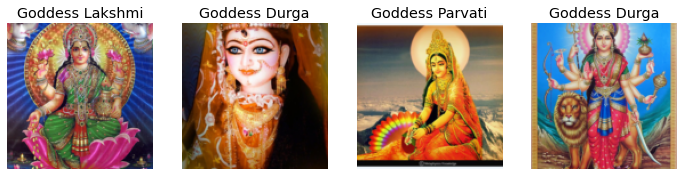

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

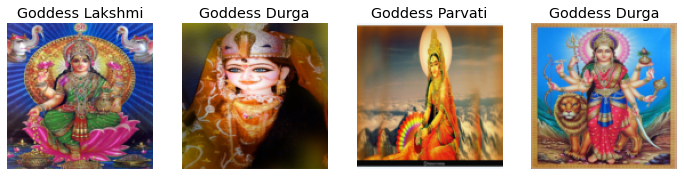

In [21]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

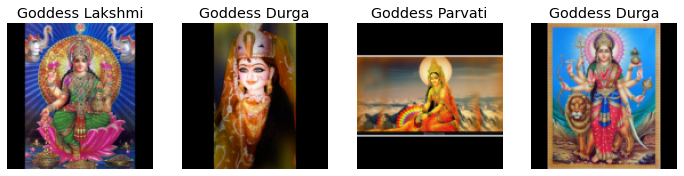

In [22]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

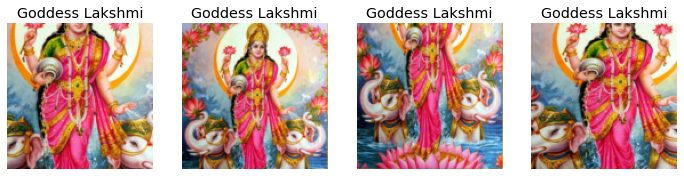

In [23]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

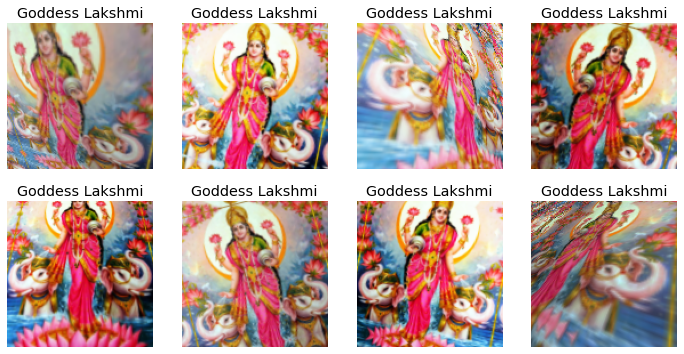

In [24]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [25]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.166779,1.836342,0.508621,00:43


epoch,train_loss,valid_loss,error_rate,time
0,1.192133,0.984226,0.370690,00:58
1,0.986356,0.826087,0.293103,00:59
2,0.877770,0.723125,0.267241,00:58
3,0.786776,0.682796,0.267241,00:58


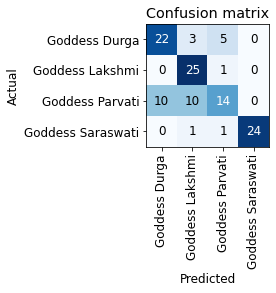

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

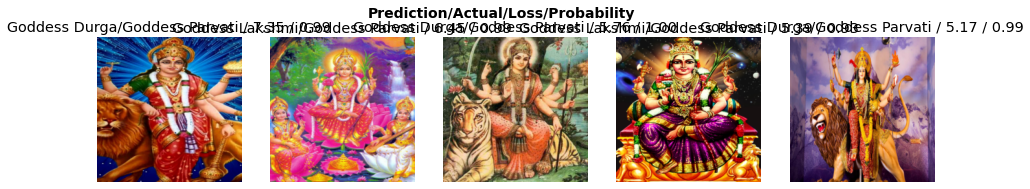

In [27]:
interp.plot_top_losses(5, nrows=1)

In [28]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
learn.export()

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
learn_inf = load_learner(path/'export.pkl')

In [31]:
learn_inf.predict('images/Goddess Saraswati.jpg')

('Goddess Durga', TensorBase(0), TensorBase([0.5115, 0.4127, 0.0273, 0.0486]))

In [32]:
learn_inf.dls.vocab

['Goddess Durga', 'Goddess Lakshmi', 'Goddess Parvati', 'Goddess Saraswati']

Signature:  verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /opt/conda/lib/python3.7/site-packages/fastai/vision/utils.py
Type:      function


verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 970.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.7 MB/s eta 0:00:00


In [33]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [34]:
learn_inf = load_learner(path/'export.pkl')

In [36]:
learn_inf.predict('images/Goddess Saraswati.jpg')

('Goddess Durga', TensorBase(0), TensorBase([0.5115, 0.4127, 0.0273, 0.0486]))

In [37]:
learn_inf.dls.vocab

['Goddess Durga', 'Goddess Lakshmi', 'Goddess Parvati', 'Goddess Saraswati']

In [ ]:
learn_inf.